<a href="https://colab.research.google.com/github/dymiyata/intro-to-ml-and-ai-2025-2026/blob/main/intro_to_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Regression

As usual, we import some necessary libraries.  This time we have a new one called NumPy.  This is a library for dealing with numerical data.  Actually Pandas is built on top of NumPy.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

We'll use the same penguin dataset that you used on the recent homework assignment.

We'll load the data with `.dropna()` to get rid of any rows with missing values.

In [39]:
df = sns.load_dataset('penguins').dropna()

Next, we'll explore the relationship between flipper length and body mass for the penguins in this data set.

We'll use flipper length as our feature variable (x) and body mass as our target variable (y).

In [40]:
X_train = df["flipper_length_mm"]
Y_train = df["body_mass_g"]

Let's see what the relationship looks like

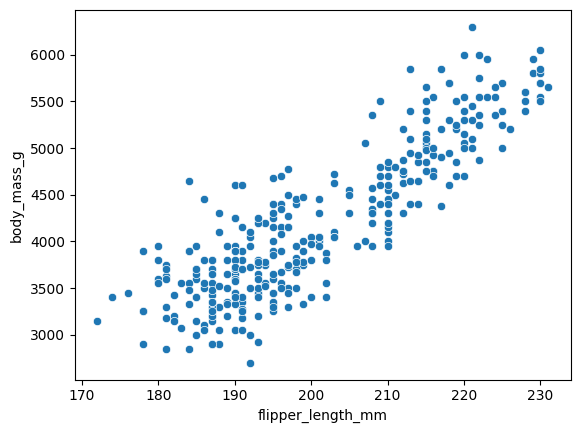

In [21]:
sns.scatterplot(x=X_train, y=Y_train)
plt.show()

### Idea of Linear Regression
As we discussed, doing linear regression means we need to find values of $w$ and $b$ such that the prediction function:
$$f(x) = w x + b$$
gives values as close to the true $y$ values as possible.  In otherwords, we need the values of $w$ and $b$ that minimize the cost function $J(w,b)$

For now, let's try to guess values of $w$ and $b$ that seem to give a pretty good prediction function. Play around with different $w$ and $b$ values and see how they look on the graph.

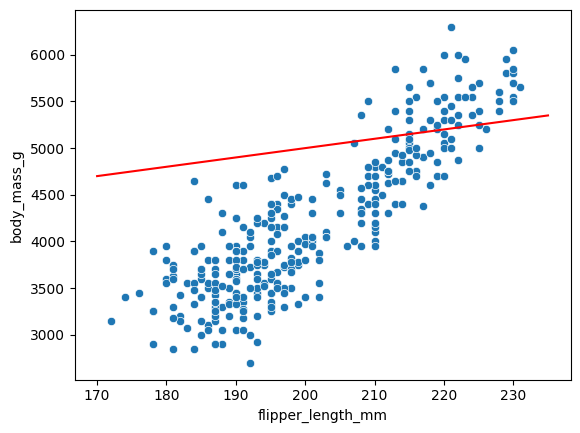

In [5]:
# Stuff to plot a line
# x is a numpy array of 100 evenly spaced values from 170 to 235
# w is slope
# b is y-intercept
x = np.linspace(170, 235, 100)
w = 10
b = 3000

# plot scatterplot with line over it
sns.scatterplot(data=df, x=X_train, y=Y_train)
plt.plot(x, w*x + b, color="red")
plt.show()

## Cost Function

Let's get a handle on the value of the cost function for our dataset for different $w$ and $b$ values

First, we define a Python function that computes the cost function

In [6]:
def mse(w, b, x_array, y_array):
  predictions= w * x_array + b
  errors = predictions - y_array
  return (errors**2).mean()

Then we use this function to compute the cost function for different $w$ and $b$.

In [7]:
w_guess = 10
b_guess = 3000
cost = mse(w_guess, b_guess, X_train, Y_train)
print(f"If w={w_guess} and b={b_guess}, then Cost={cost:.2f}")

If w=10 and b=3000, then Cost=1113745.50


### Gradient Descent

Here, we manually implement Gradient Descent so the computer can find the values of $w$ and $b$ that minimize the cost function.  

The idea is that we loop through the training set.  Each iteration is called an *epoch* (pronounced like "epic" if you're American or "eepock" if you're British).

- For each epoch, we use *calculus* to determine how much to adjust $w$ and $b$.
- Update $w$ and $b$ based on that amount
- Repeat

Here I wrote code to do this 25 times.

You will not have to reproduce code like this, we will use libraries (mainly Scikit-learn) to do this stuff for us automatically.  However, it's good to be exposed to how it works under the hood.

In [41]:
# Start with guesses for w and b
w = 0.0
b = 0.0

# The learning rate is the step size we take when adjusting w and b
learning_rate = 0.01
# Define the number of epochs (i.e. how many times to loop through data set)
epochs = 25

m = len(Y_train)

# Normalize the data (scale them down to be close to 0)
# This is a technical step just so values don't get really big
X_mean, X_std = X_train.mean(), X_train.std()
Y_mean, Y_std = Y_train.mean(), Y_train.std()
X_norm = (X_train - X_mean) / X_std
Y_norm = (Y_train - Y_mean) / Y_std

for epoch in range(epochs):
  # Create the array of predicted values
  Y_pred = w * X_norm + b

  # Compute cost for displaying later
  error = Y_pred - Y_norm
  cost = (error**2).mean()

  # Compute gradient (amounts to adjust w and b)
  dw = (2/m) * np.sum(X_train * (Y_pred - Y_norm))
  db = (2/m) * np.sum(Y_pred - Y_norm)

  # Update the parameters w and b using the gradient
  w -= learning_rate * dw
  b -= learning_rate * db

  # print the cost after each epoch
  if epoch % 2 == 0:
    print(f"Epoch {epoch} | Cost: {cost:.6f}")

# un-normalize to get the actual values of w and b
w_real = w * (Y_std / X_std)
b_real = b * Y_std + Y_mean - w_real * X_mean

print(f"After training: w={w_real:.2f}, b={b_real:.2f}")

Epoch 0 | Cost: 0.996997
Epoch 2 | Cost: 0.441980
Epoch 4 | Cost: 0.292389
Epoch 6 | Cost: 0.252070
Epoch 8 | Cost: 0.241203
Epoch 10 | Cost: 0.238274
Epoch 12 | Cost: 0.237485
Epoch 14 | Cost: 0.237272
Epoch 16 | Cost: 0.237215
Epoch 18 | Cost: 0.237199
Epoch 20 | Cost: 0.237195
Epoch 22 | Cost: 0.237194
Epoch 24 | Cost: 0.237194
After training: w=50.14, b=-5869.31


### Plot the resulting regression line

Now that the computer found the optimal $w$ and $b$ values, we can plot them

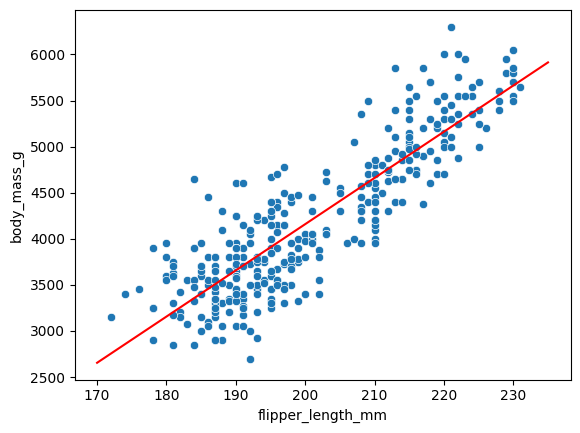

In [9]:

x = np.linspace(170,235,100)

# The w and b values the computer found were called w_real and b_real
sns.scatterplot(data=df, x=X_train, y=Y_train)
plt.plot(x, w_real*x + b_real, color="red")
plt.show()

## Making a Prediction

Now if the flipper length of a penguin is 200mm, what do you predict the body mass of the penguin to be?

In [10]:
print(f"We predict its body mass to be about {w_real * 200 + b_real:.2f} grams")

We predict its body mass to be about 4158.57 grams


This was a lot of work... And some complicated code... Is there an easier way???

# Using the Scikit-learn library

Luckily for us, we don't have to implement linear regression (and most of the machine learning models we'll use) from scratch like this.  We will make use of a library called Scikit-learn.

First we import the linear regression model from Scikit-learn (`sklearn`)

In [12]:
from sklearn.linear_model import LinearRegression

Next, we need to initialize the model

In [14]:
model = LinearRegression()

Now, we train the model to our penguin training data from earlier.

Here, we call `model.fit()` and input the training data as the arguments.  

**Note**: An important detail is that the `LinearRegression` model in Scikit-learn expects a 2D array for the input feature data (the X data).  Thus, we will need to slightly modify our `X_train`
- Currently our `X_train` is a Series (a 1D array of data).  
- We need a 2D array of data so we'll just think of our 1D array as a 2D array where the number of columns is just 1.

In [42]:
X_train_2D = df[["flipper_length_mm"]]
model.fit(X_train_2D, Y_train)

LinearRegression()

Seems like nothing happened...

However, now the model has parameters stored.

- To access the slope (w) of the model, we can use `model.coef_[0]`

- To access the y-intercept (b), we can use `model.intercept_`

Note: Scikit-learn uses a trailing underscore for fitted parameters/attributes (i.e. the values that are learned from the training data)

In [43]:
print(model.coef_[0])
print(model.intercept_)

50.15326594224113
-5872.092682842825


We can even get the predicted y values by running `model.predict` on the x value of the training data.  

You should think of `model.predict` as actually running the function on some inputs.


In [44]:
Y_pred = model.predict(X_train_2D)

Then, we can visualize the prediction with a scatterplot for the original data and a lineplot for the predicted data.

---



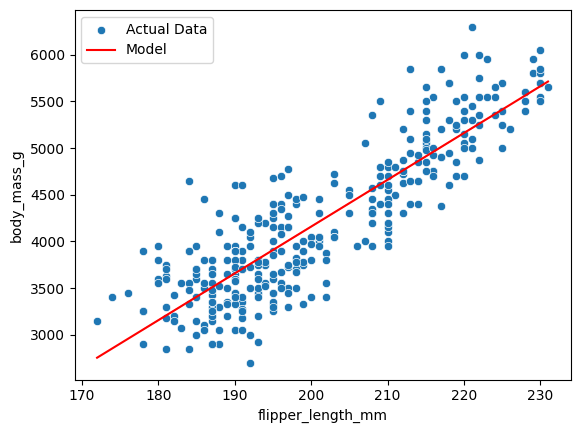

In [45]:
sns.scatterplot(x=X_train_2D["flipper_length_mm"], y=Y_train, label="Actual Data")
sns.lineplot(x=X_train_2D["flipper_length_mm"], y=Y_pred, color="red", label="Model")
plt.show()

Finally, Scikit-learn also gives us a way to compute the cost function (MSE).

To do this, we need to import the necessary module:

In [46]:
from sklearn.metrics import mean_squared_error

To compute the MSE cost function, we call `mean_squared_error()` with the actual y values and the predicted y values as the arguments.

In [47]:
mean_squared_error(Y_train, Y_pred)

153789.67786691786

In general, if you have the actual y values and the predicted y values for any regression model, you can compute the MSE cost function this way.  (For instance you could use this to check your homework from last week).